## **Laboratorio #2**

Ejercicio 1

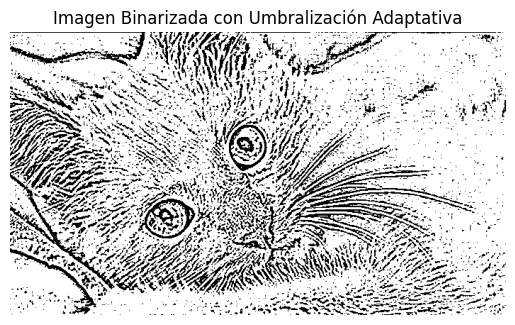

In [6]:
import cv2
import matplotlib.pyplot as plt

def adaptive_binarize_image(image_path):
    # Cargar la imagen en escala de grises
    image = cv2.imread('/content/gato-de-angora-5.jpg', cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("No se pudo cargar la imagen. Verifica la ruta")

    # Aplicar la umbralización adaptativa
    binary_image = cv2.adaptiveThreshold(image, 255,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY,
                                         11, 2)

    return binary_image

# Ejemplo de uso:
image_path = '/content/gato-de-angora-5.jpg'  # Ruta de la imagen
binary_image = adaptive_binarize_image(image_path)

# Mostrar la imagen binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagen Binarizada con Umbralización Adaptativa')
plt.axis('off')
plt.show()


Ejercicio 2

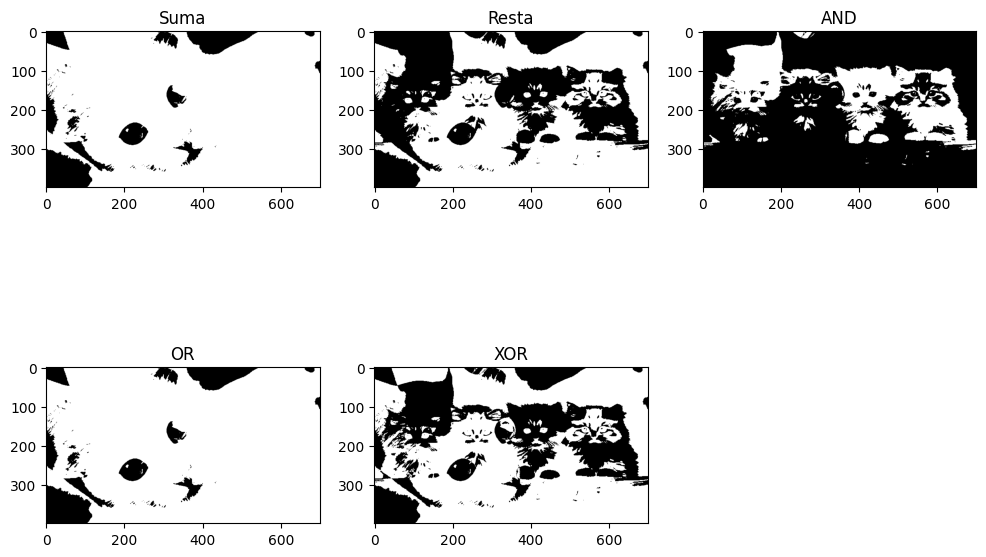

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_images(image_path1, image_path2):
    # Cargar las imágenes en escala de grises
    image1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    if image1 is None or image2 is None:
        raise ValueError("No se pudo cargar una de las imágenes. Verifica las rutas, por favor.")

    # Redimensionar la segunda imagen para que coincida con el tamaño de la primera
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Binarizar las imágenes usando un umbral fijo
    _, binary_image1 = cv2.threshold(image1, 127, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(image2, 127, 255, cv2.THRESH_BINARY)

    # Suma y Resta
    suma = cv2.add(binary_image1, binary_image2)
    resta = cv2.subtract(binary_image1, binary_image2)

    # AND, OR, XOR
    and_op = cv2.bitwise_and(binary_image1, binary_image2)
    or_op = cv2.bitwise_or(binary_image1, binary_image2)
    xor_op = cv2.bitwise_xor(binary_image1, binary_image2)

    # Mostrar resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(231), plt.imshow(suma, cmap='gray'), plt.title('Suma')
    plt.subplot(232), plt.imshow(resta, cmap='gray'), plt.title('Resta')
    plt.subplot(233), plt.imshow(and_op, cmap='gray'), plt.title('AND')
    plt.subplot(234), plt.imshow(or_op, cmap='gray'), plt.title('OR')
    plt.subplot(235), plt.imshow(xor_op, cmap='gray'), plt.title('XOR')

    plt.show()

#Muestra con las imagens:
image_path1 = '/content/gato-de-angora-5.jpg'  # imagen1
image_path2 = '/content/imagen2.jpg'  # imagen2

process_images(image_path1, image_path2)


Ejercicio3

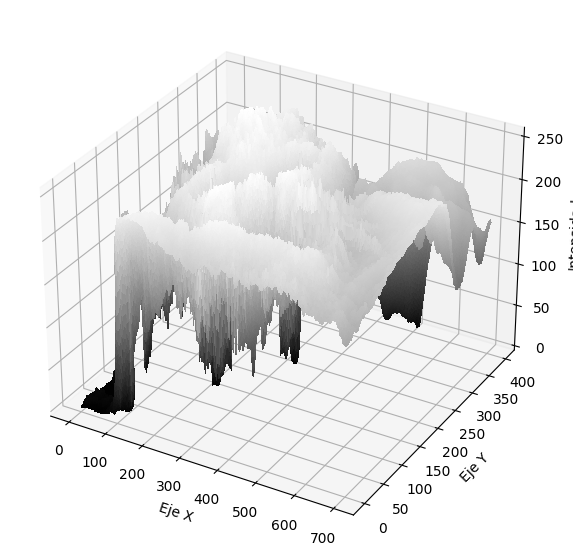

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_image(image_path):
    # Cargar la imagen
    image = cv2.imread('/content/gato-de-angora-5.jpg', cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

    # dimensiones de la imagen
    x = np.arange(0, image.shape[1])
    y = np.arange(0, image.shape[0])
    x, y = np.meshgrid(x, y)

    # Invertir los valores en el eje Y
    y = np.flip(y, axis=0)

    # Crear la figura en 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plotear la superficie
    ax.plot_surface(x, y, image, cmap='gray', rstride=1, cstride=1, linewidth=0, antialiased=False)


    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad')

    # Mostrar la gráfica
    plt.show()

# Imagen elegida
image_path = '/content/gato-de-angora-5.jpg'
plot_3d_image(image_path)


Ejercicio 4

<ipython-input-16-29b43fe04a4e>:9: RuntimeWarning: divide by zero encountered in log
  return c * np.log(1 + image)


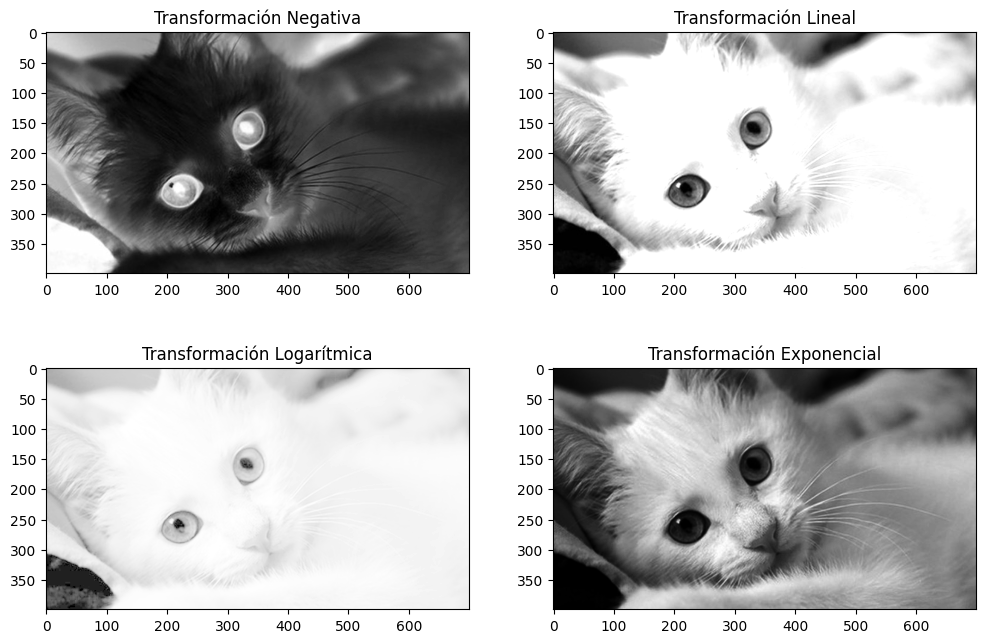

In [16]:

def negative_transform(image):
    return 255 - image

def linear_transform(image, a=1.0, b=0.0):
    return cv2.convertScaleAbs(image, alpha=a, beta=b)

def logarithmic_transform(image):
    c = 255 / np.log(1 + np.max(image))
    return c * np.log(1 + image)

def exponential_transform(image, a=1.0):
    c = 255 / (np.exp(a * 255) - 1)
    return c * (np.exp(a * image) - 1)

# Ejemplo de uso
image_path = '/content/gato-de-angora-5.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

# Aplicar las transformaciones
neg_image = negative_transform(image)
lin_image = linear_transform(image, a=1.2, b=20)
log_image = logarithmic_transform(image)
exp_image = exponential_transform(image, a=0.01)

# Mostrar resultados
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(neg_image, cmap='gray'), plt.title('Transformación Negativa')
plt.subplot(222), plt.imshow(lin_image, cmap='gray'), plt.title('Transformación Lineal')
plt.subplot(223), plt.imshow(log_image, cmap='gray'), plt.title('Transformación Logarítmica')
plt.subplot(224), plt.imshow(exp_image, cmap='gray'), plt.title('Transformación Exponencial')

plt.show()


Ejercicio 5

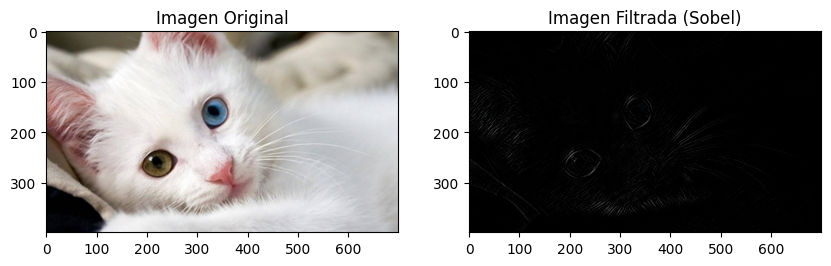

In [19]:
def apply_filter(img_path, filter_type='gaussian', filter_size=(3, 3)):
    # Cargar la imagen en color
    img = cv2.imread(img_path)

    if img is None:
        raise ValueError("No se pudo cargar la imagen.")

    # Crear el kernel basado en el tipo y tamaño especificado
    if filter_type == 'gaussian':
        kernel = cv2.getGaussianKernel(filter_size[0], 0)
        kernel = np.outer(kernel, kernel)
    elif filter_type == 'sobel':
        if filter_size[0] % 2 == 0:  # Sobel kernel debe ser de tamaño impar
            raise ValueError("El tamaño del kernel de Sobel debe ser impar.")
        kernel = cv2.getDerivKernels(1, 0, filter_size[0])[0]  # Derivada en X
        kernel = np.outer(kernel, kernel.T)  # Sobel en X e Y
    elif filter_type == 'sharp':
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
    elif filter_type == 'unsharp':
        kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])
    elif filter_type == 'laplacian':
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]])
    else:
        raise ValueError("Tipo de filtro no soportado.")

    # Aplicar la convolución a la imagen
    img_filtered = cv2.filter2D(img, -1, kernel)

    # Mostrar la imagen original y la filtrada
    plt.figure(figsize=(10, 5))

    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
    plt.subplot(122), plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB)), plt.title(f'Imagen Filtrada ({filter_type.capitalize()})')

    plt.show()

# Ejemplo de uso:
img_path = '/content/gato-de-angora-5.jpg'  # Reemplaza con la ruta de tu imagen
apply_filter(img_path, filter_type='sobel', filter_size=(3, 3))


Ejercicio 6

El kernel Laplaciano detecta bordes al resaltar los cambios bruscos en los tonos de la imagen, pero puede confundirse con el ruido y no dice en qué dirección va el borde. En tanto que, el algoritmo de Canny es más completo dado que suaviza la imagen primero y luego encuentra los bordes para asegurarse de que sean continuos y precisos, siendo menos afectado por el ruido, aunque es un poco más lento y complicado de usar.

Ejercicio extra:

Score normalizado: 0.44
La imagen no necesita ecualización del histograma.


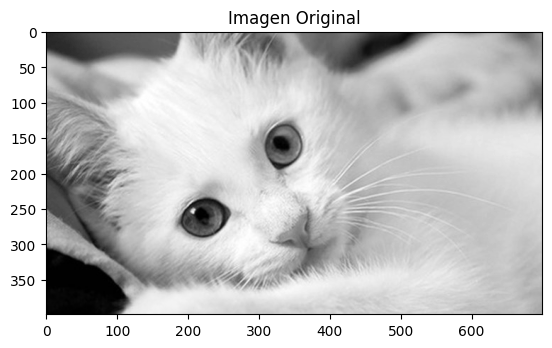

In [21]:
def analyze_and_adjust_histogram(img_path):
    # Cargar la imagen en escala de grises
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img_gray is None:
        raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

    # Calcular la desviación estándar de los píxeles de la imagen
    pixel_std_dev = np.std(img_gray)

    # Normalizar el valor entre 0 y 1
    normalized_score = pixel_std_dev / 128.0  # Dividir por 128 para normalizar en el rango [0, 1]

    print(f"Score normalizado: {normalized_score:.2f}")

    if normalized_score > 0.5:
        print("La imagen necesita ecualización del histograma.")
        # Aplicar ecualización del histograma
        img_equalized = cv2.equalizeHist(img_gray)

        # Mostrar la imagen original y la ecualizada
        plt.figure(figsize=(10, 5))
        plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('Imagen Original')
        plt.subplot(122), plt.imshow(img_equalized, cmap='gray'), plt.title('Imagen Ecualizada')
        plt.show()
    else:
        print("La imagen no necesita ecualización del histograma.")
        # Mostrar solo la imagen original
        plt.imshow(img_gray, cmap='gray')
        plt.title('Imagen Original')
        plt.show()

img_path = '/content/gato-de-angora-5.jpg'  # Reemplaza con la ruta de tu imagen
analyze_and_adjust_histogram(img_path)
